In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset Information
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

## Data Preprocessing

### Importing the Dataset

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 

In [2]:
df = pd.read_excel('Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Checking null Values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Descriptive Statistical Data Analysis

In [4]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending=False)

Net Hourly Electrical Energy Output    1.000000
Ambient Pressure                       0.518429
Relative Humidity                      0.389794
Exhaust Vacuum                        -0.869780
Average Temperature                   -0.948128
Name: Net Hourly Electrical Energy Output, dtype: float64

## Spliting the Dataset

In [7]:
from sklearn.model_selection import train_test_split
x= df.iloc[:,:4].values
y=df.iloc[:,-1].values
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Building the Neural Network

In [10]:
import tensorflow as tf


tf.__version__

'2.13.0'

### Inintializing Neural Network and Adding Input Layer

In [11]:
nn = tf.keras.Sequential()

#Input Layer 
nn.add(tf.keras.layers.Input(shape=(4,)))

### Adding Input and Output Layer

In [12]:
nn.add(tf.keras.layers.Dense(units=4,activation='relu'))
nn.add(tf.keras.layers.Dense(units=3,activation='relu'))

# Output Layer
nn.add(tf.keras.layers.Dense(units=1))

In [13]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling  aNN Training the ANN

In [14]:
#compileing the ann
nn.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
# Training the ANN
nn.fit(x_train,y_train,batch_size=24,epochs=100,validation_data=(x_test,y_test),callbacks=tf.keras.callbacks.EarlyStopping
(monitor='val_loss',patience=4,restore_best_weights=True))

Epoch 1/100
319/319 [==============================] - 2s 3ms/step - loss: 206131.5000 - val_loss: 204992.9688
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 201846.0781 - val_loss: 197978.9375
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 190719.7500 - val_loss: 181019.5469
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 168508.0000 - val_loss: 154005.7969
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 140975.2031 - val_loss: 126779.1172
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 117912.5781 - val_loss: 108289.8672
Epoch 7/100
319/319 [==============================] - 1s 3ms/step - loss: 103984.1641 - val_loss: 96271.4062
Epoch 8/100
319/319 [==============================] - 1s 2ms/step - loss: 87260.5938 - val_loss: 74210.0391
Epoch 9/100
319/319 [==============================] - 1s 2ms/step - loss: 62097.2734 - val_loss: 48391.6016
Epoch 

## Making Predictions and Evaluating the Model performance

In [16]:
pd.DataFrame(nn.history.history)

,loss,val_loss
0,206131.500000,204992.968750
1,201846.078125,197978.937500
2,190719.750000,181019.546875
3,168508.000000,154005.796875
4,140975.203125,126779.117188
5,117912.578125,108289.867188
6,103984.164062,96271.406250
7,87260.593750,74210.039062
8,62097.273438,48391.601562
9,37216.062500,26050.486328


<Axes: >

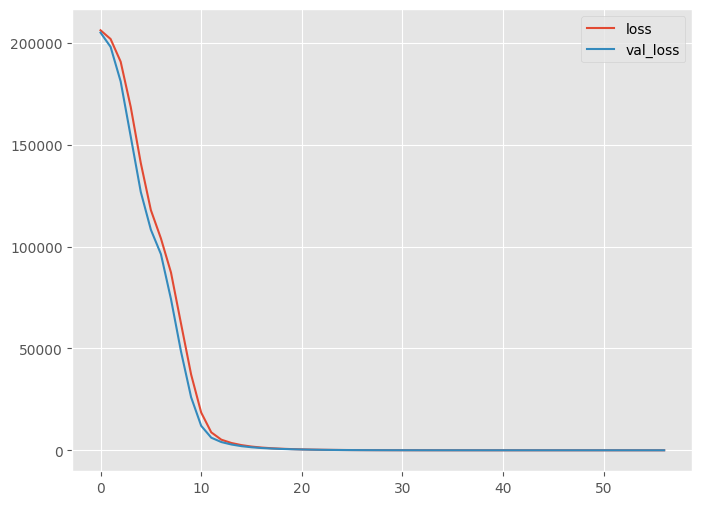

In [17]:
plt.style.use("ggplot")
pd.DataFrame(nn.history.history).plot(figsize=(8,6))

#### Evaluting NN on Training set

In [18]:
nn.evaluate(x_train,y_train)

240/240 [==============================] - 1s 2ms/step - loss: 20.2224


20.22238540649414

#### Evaluating NN on Test set

In [19]:
nn.evaluate(x_test,y_test)

60/60 [==============================] - 0s 3ms/step - loss: 18.7687


18.76870346069336

#### Predictions

In [20]:
nn_pred = nn.predict(x_test)
print(nn_pred.shape)
print(y_test.shape)

60/60 [==============================] - 0s 2ms/step
(1914, 1)
(1914,)


#### Comparing predicting values with Actual values

In [34]:
d = {'Actual values':y_test,'Predictions':np.ravel(nn_pred)}
pred_df = pd.DataFrame(d)
pred_df

,Actual values,Predictions
0,431.23,432.557526
1,460.01,454.101471
2,461.14,463.374664
3,445.90,448.278717
4,451.29,456.862915
...,...,...
1909,460.29,461.242493
1910,452.42,455.384674
1911,473.26,467.281860
1912,438.00,442.719635


### Scatter Plot

Text(0, 0.5, 'Actual Values')

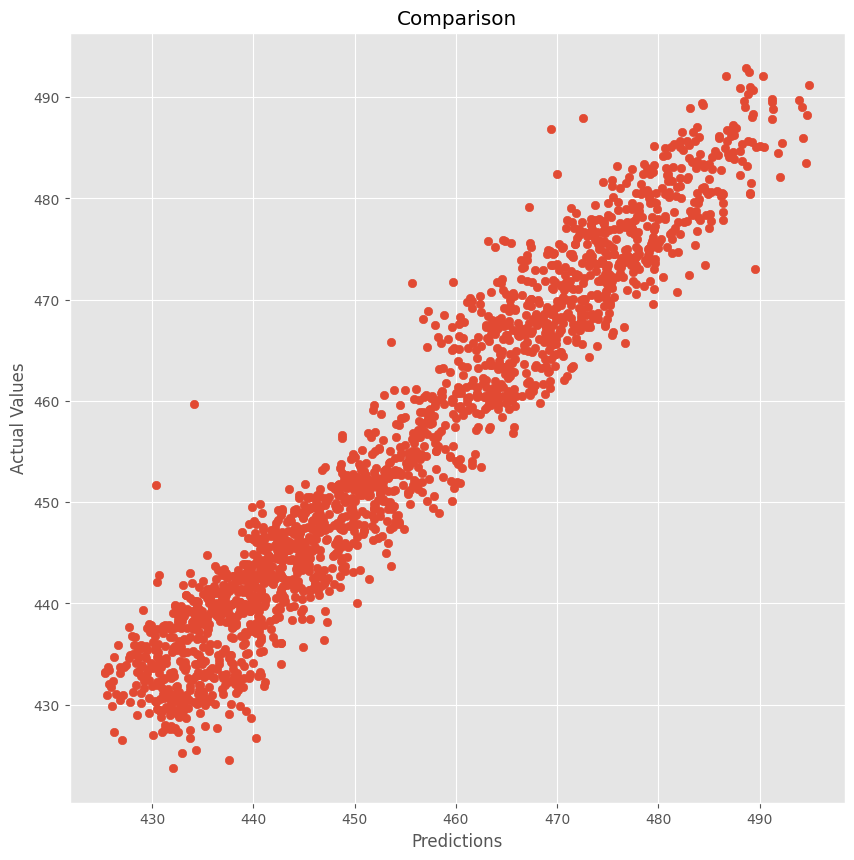

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,np.ravel(nn_pred))
plt.title("Comparison")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

### Model Performance

In [36]:
#calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,nn_pred))
print ("MSE:",metrics.mean_squared_error(y_test,nn_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,nn_pred)))

MAE: 3.484822645994563
MSE: 18.768701759057283
RMSE: 4.332285973831516
